# TUGAS AKHIR MODUL 14 : Membangun Model ANN
# Kelas UG04 Kelompok 8
1.	05124873131-20/Herianto
2.	05124873011-21/Dinaroe
3.	05124873181-3/Fadhli Dzil Ikram

Judul Tugas Akhir :
**Upaya Meningkatkan Jumlah Mahasiswa Aktif di Perguruan Tinggi Swasta dengan Cara Membangun Sistem Untuk Mengidentifikasi Sedini Mungkin Calon Mahasiswa Baru atau Mahasiswa Lama Yang Berpotensi Keluar**

Sumber dataset : **Database Sistem Akademik Universitas Darma Persada Jakarta**

Dataset yang digunakan dalam Notebook ini adalah dataset daftar calon mahasiswa dari database akademik yang sebelumnya sudah dilakukan beberapa proses di tahap data preparation
Dataset dapat di-load dengan potongan kode di bawah:

In [41]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_klasifikasi=pd.read_csv("..\dataset\dataset_pendaftar_clean_klasifikasi.csv")
#Featureg
Xy=df_klasifikasi[['sedang_promo','sedang_ptn','idjenissekolah','idpend_ayah','ekonomi_nasional','isdaftarulang']]
X=df_klasifikasi[['sedang_promo','sedang_ptn','idjenissekolah','idpend_ayah','ekonomi_nasional']]
scale = MinMaxScaler()
X = scale.fit_transform(X)

#Target
y=df_klasifikasi['isdaftarulang']
Xy
X

array([[0.5       , 0.        , 0.85714286, 0.3       , 0.95906038],
       [0.5       , 0.        , 0.        , 0.3       , 0.95906038],
       [0.5       , 0.        , 0.42857143, 0.3       , 0.95906038],
       ...,
       [0.5       , 0.        , 0.14285714, 0.2       , 0.86923804],
       [0.5       , 0.        , 0.        , 0.3       , 0.86923804],
       [0.5       , 0.        , 0.14285714, 0.3       , 0.86923804]])

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (5688, 5)
X_val (1004, 5)
X_test (744, 5)


In [43]:
print(y)

0       1
1       0
2       1
3       0
4       1
       ..
7431    0
7432    0
7433    0
7434    0
7435    0
Name: isdaftarulang, Length: 7436, dtype: int64


In [44]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [45]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.8376494023904383


In [46]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 0.8172043010752689


Akurasi Testing ANN: 0.8172043010752689


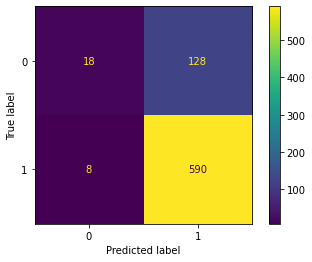

In [47]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

In [48]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train,2)
Y_val = to_categorical(Y_val,2)
Y_test = to_categorical(Y_test,2)

In [49]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [50]:
model.fit(X_train,Y_train,epochs=100,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/100
1138/1138 [==============================] - 3s 2ms/step - loss: 0.4986 - acc: 0.8010 - val_loss: 0.4911 - val_acc: 0.8058
Epoch 2/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4871 - acc: 0.8073 - val_loss: 0.4875 - val_acc: 0.8058
Epoch 3/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4827 - acc: 0.8073 - val_loss: 0.4918 - val_acc: 0.8058
Epoch 4/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4782 - acc: 0.8073 - val_loss: 0.4794 - val_acc: 0.8058
Epoch 5/100
1138/1138 [==============================] - 3s 2ms/step - loss: 0.4737 - acc: 0.8073 - val_loss: 0.4775 - val_acc: 0.8058
Epoch 6/100
1138/1138 [==============================] - 3s 3ms/step - loss: 0.4675 - acc: 0.8073 - val_loss: 0.4705 - val_acc: 0.8058
Epoch 7/100
1138/1138 [==============================] - 3s 2ms/step - loss: 0.4619 - acc: 0.8073 - val_loss: 0.4663 - val_acc: 0.8058
Epoch 8/100
1138/1138 [==============================] 

1138/1138 [==============================] - 2s 2ms/step - loss: 0.4157 - acc: 0.8319 - val_loss: 0.4209 - val_acc: 0.8376
Epoch 62/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4175 - acc: 0.8310 - val_loss: 0.4409 - val_acc: 0.8367
Epoch 63/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4167 - acc: 0.8312 - val_loss: 0.4240 - val_acc: 0.8376
Epoch 64/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4161 - acc: 0.8312 - val_loss: 0.4344 - val_acc: 0.8376
Epoch 65/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4169 - acc: 0.8312 - val_loss: 0.4194 - val_acc: 0.8376
Epoch 66/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4171 - acc: 0.8312 - val_loss: 0.4202 - val_acc: 0.8376
Epoch 67/100
1138/1138 [==============================] - 2s 2ms/step - loss: 0.4175 - acc: 0.8305 - val_loss: 0.4185 - val_acc: 0.8376
Epoch 68/100
1138/1138 [==============================] - 2s 

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 130       
Total params: 514
Trainable params: 514
Non-trainable params: 0
_________________________________________________________________


In [54]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

24/24 [==============================] - 0s 2ms/step - loss: 0.4183 - acc: 0.8172
Akurasi Testing ANN: 0.8172042965888977
